1. Import Packages

In [112]:
#here we are simply importing the necessary packages to run our ensemble methods

import pandas as pd
import numpy as np
import sklearn
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [113]:
#Here we mount google drive in order to read in the files we need
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
#reading in the census data so that we can begin our data quality analysis
census = pd.read_csv('/content/drive/My Drive/Colab Notebooks/census_data.csv')

In [115]:
#Here we are showing the first five rows of our dataset to get an overview 
#of what we are working with.
census.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


2. Finding the Optimal Value of a key Hyper-Parameter

For Ensemble Models, one of the key hyper-parameter is number of “estimators”.
Following is an example of fining the optimal value of “Maximum Depth”. Review the following code snippet to understand how the optimal value of this hyper-parameter (Max Depth = 10) is found by plotting a graph.

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Below, our for loop is running the tree model with different max depth options. It is then generating the accuracy score and plotting for each tree. Thus, it appears as though 10 is the best max depth for this tree. We will then apply this knowledge to the rest of this assignment.

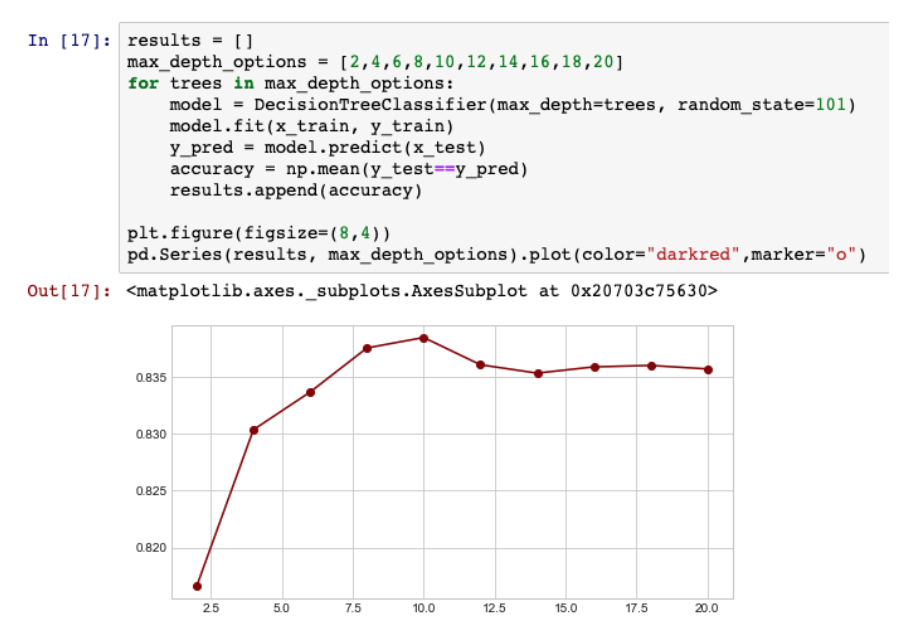

3. Building a Random Forest Model

In [116]:
#The goal in this section is to use our data source (census)
#and to train a random forest model. We will be using a similar approach to the 
#method about (Section 2: "Finding the Optimal Value of a key Hyper-Parameter")
#in order to plot a graph of the accuracy versus n_estimator. The vales for
#n_estimator will be: [50,100,150,200,250,300,350,400,450,500]

#The first step in this process is to perform a data quality analysis 
#to make sure our data is ready to be modeled. 

print(census.isnull().sum())

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64


In [117]:
#We have found zero null values in any of the columns and now we will 
#get an understanding of the data types we are working with. From the 
#line of code below and output, we can see that all columns are object type
#except for y which is int64

print(census.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB
None


In [118]:
#lastly we are getting a look at our census data described and here we see our
#count, number of unique values, and frequency of most occuring values

census.describe(exclude=[np.number])

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,5,5,3,3,3,5,5,2,5,2
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561


In [119]:
#The first step in being able to build a random forest model is factorizing our 
#dataset. We will need to apply this to all of our columns except for the y 
#column. Thus, in order to keep our original dataset in tact, we will create a 
#copy of our dataset with all values except for y and flag. Flag is removed 
#because it is how we are going to determine what is train and test. This 
#is done below: 

census_copy=census.copy()[['hours_per_week_bin','occupation_bin','msr_bin',
                           'capital_gl_bin','race_sex_bin','education_bin',
                           'age_bin']]

In [120]:
#Checking out our code to make sure it worked. We should see all columns 
#except for the y and flag column.

census_copy.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_bin,age_bin
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. Bachelors,d. 36-40 & 56-60
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. Bachelors,e. 40-55
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. Mid,d. 36-40 & 56-60
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. Low,e. 40-55
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. Bachelors,b. 26-30 & 71-100


In [121]:
#Now that we have a copy of our dataset, we can factorize the necessary columns.
for column in census_copy.columns:
  census_copy[column]=pd.factorize(census_copy[column])[0]

In [122]:
#Now we are going to check our census copy that is now factorized to make sure 
#that it looks how it should. We should see our data in number values

census_copy.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_bin,age_bin
0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,1
2,0,2,0,1,0,1,0
3,0,2,1,1,1,2,1
4,0,1,1,1,2,0,2


In [123]:
#Our data looks factorized according to plan so we may not add our y and flag 
#columns back to our dataset so we have a y value and a way to separate our data
#into train and test. 

census_copy['flag']=census['flag']
census_copy['y']=census['y']

In [124]:
#To ensure that our code worked, we are going to look at the first five rows.
#Our data should have our census copy from before but now with the y and flag
#columns added in. 

census_copy.head(10)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_bin,age_bin,flag,y
0,0,0,0,0,0,0,0,train,0
1,1,1,1,1,0,0,1,train,0
2,0,2,0,1,0,1,0,train,0
3,0,2,1,1,1,2,1,train,0
4,0,1,1,1,2,0,2,train,0
5,0,1,1,1,1,3,0,train,0
6,1,2,0,1,2,2,1,train,0
7,2,1,1,1,0,1,1,train,1
8,2,1,0,0,1,3,3,train,1
9,0,1,1,0,0,0,1,train,1


In [125]:
#The final step before running our actual model is to split our data into train 
#and test. This is done through the y column which, as you can see above, tells
#us whether it is train data or test data. 

census_train=census_copy[census_copy['flag']=='train']
census_test=census_copy[census_copy['flag']=='test']

In [126]:
#If the above code worked, we should see our data split into just train and just 
#test. We will run a head on each dataset to determine if it worked.

census_train.head(10)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_bin,age_bin,flag,y
0,0,0,0,0,0,0,0,train,0
1,1,1,1,1,0,0,1,train,0
2,0,2,0,1,0,1,0,train,0
3,0,2,1,1,1,2,1,train,0
4,0,1,1,1,2,0,2,train,0
5,0,1,1,1,1,3,0,train,0
6,1,2,0,1,2,2,1,train,0
7,2,1,1,1,0,1,1,train,1
8,2,1,0,0,1,3,3,train,1
9,0,1,1,0,0,0,1,train,1


In [127]:
#Our train data worked and now we will run on test to ensure that that is 
#correct as well

census_test.head(10)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_bin,age_bin,flag,y
32561,0,0,2,1,1,2,4,test,0
32562,2,0,1,1,0,1,0,test,0
32563,0,4,1,1,0,1,2,test,1
32564,0,0,1,0,1,1,1,test,1
32565,1,0,2,1,1,1,4,test,0
32566,1,2,0,1,0,2,3,test,0
32567,0,0,2,1,1,1,2,test,0
32568,0,1,1,0,0,4,3,test,1
32569,0,2,2,1,1,1,4,test,0
32570,1,3,1,1,0,2,1,test,0


In [128]:
#Our datasets look pefectly separated into train and test. The final step 
#before our model is putting our data into x_test, x_train, y_test, and y_train

x_train = census_train[['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_bin','age_bin']]
y_train = census_train['y']
x_test=X = census_test[['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_bin','age_bin']]
y_test = census_test['y']

In [129]:
#Running head on each to ensure correctness. We should see x_train and x_test
#have only the factorized columns. Our y_train and y_test should have only 
#the y values. 

x_train.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_bin,age_bin
0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,1
2,0,2,0,1,0,1,0
3,0,2,1,1,1,2,1
4,0,1,1,1,2,0,2


In [130]:
x_test.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_bin,age_bin
32561,0,0,2,1,1,2,4
32562,2,0,1,1,0,1,0
32563,0,4,1,1,0,1,2
32564,0,0,1,0,1,1,1
32565,1,0,2,1,1,1,4


In [131]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [132]:
y_test.head()

32561    0
32562    0
32563    1
32564    1
32565    0
Name: y, dtype: int64

In [133]:
#In order to run our ensemble model we need to import the ensemble part of 
#sklearn. 

import sklearn.ensemble

In [134]:
#If you remember, our values for n_estimator will be: 
#[50,100,150,200,250,300,350,400,450,500]. Thus we need to make our values 
#equal to this. We will then also need an empty to append our accuracy values
#to. 

n_estimator=list(range(50,550,50))
accuracy_list=[]

In [135]:
for i in n_estimator:

  #Creating ensemble that uses the ensemble random forest classifier on our 
  #n_estimator list.
  ensemble = sklearn.ensemble.RandomForestClassifier(n_estimators=i,
                                                     random_state=101)
  
  #Now we are using the ensemble we made and fitting it with our train data
  ensemble.fit(x_train,y_train)

  #Next, we will make y_pred and use our fitted ensemble model to predict our
  #values in x_test. 
  y_pred = ensemble.predict(x_test)

  #Lastly, we will create our accuracy value and then append it to accuracy_lit
  accuracy = np.mean(y_test==y_pred)
  accuracy_list.append(accuracy)

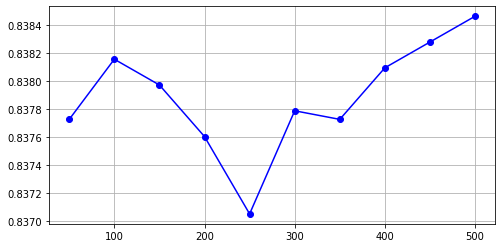

In [136]:
plt.figure(figsize=(8,4))

pd.Series(accuracy_list,n_estimator).plot(color='blue',marker='o')
plt.grid()

plt.show()


The answer to the questions will also be in the word document. But for ease of access it is included here: 

Is there an optimal value of the estimator within the given range?

3.1 Write your observations about the Classifier’s behavior with respect to the number of estimators: 

Here we see an initial high point accuracy of 0.83819 at 100 estimators but then we see a continual dropoff until the estimators reach 250. From there we see a pretty consistent increae in accuracy until we reach the max number of estimators at 500 with an accuracy of 0.83845


3.2 Is there an optimal value of the estimator within the given range?

In order, our most accuracte values are: 

1. 500 estimators - accuracy: 0.83845
2. 450 estimators - accuracy: 0.83828
3. 100 estimators - accuracy: 0.83819

Thus, it seems like our optimal estimator would be 500 because it is the most accurate. 

4. Building AdaBoost, Gradient Boost (classifier) and XGB Model

In [137]:
#the next step in our random forest model is called boosting. Boosting is where 
#we can improve our model through a variety of methods. The following methods 
#we are going to try are AdaBoost, Gradient Boost, and XGB Model. 

#The process will be relatively similar for each method but with different 
#imports and slightly different methods

#We will start with our AdaBoost model below. The first step is importing the 
#necessary package

from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [138]:
#ADA BOOST
#---------------------------------------------------
#Setting up estimators and accuracy list to be appened for adaboost 

n_estimator=list(range(50,550,50))
accuracy_list_ada=[]

In [139]:
for i in n_estimator:
  #using similar method but for adaboost

  ensemble_ada = AdaBoostClassifier(n_estimators=i,random_state=101)
  ensemble_ada.fit(x_train,y_train)

  #creating y_pred from ada prediction
  y_pred = ensemble_ada.predict(x_test)

  #creating accuracy and then appending it to adaboost accuracy list
  accuracy = np.mean(y_test==y_pred)
  accuracy_list_ada.append(accuracy)


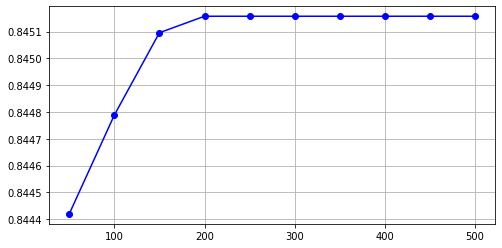

In [140]:
#plotting graph
plt.figure(figsize=(8,4))

pd.Series(accuracy_list_ada,n_estimator).plot(color='blue',marker='o')
plt.grid()

plt.show()

In [141]:
#From our boosted graph we an see that as our estimators increases, our 
#accuracy increases until about 200 estimators. From there, our accuracy seems
#to stay about the same. Thus, our optimal estimator number will be >= 200

In [142]:
#GRADIENT BOOST CLASSIFIER
#---------------------------------------------------
#Setting up estimators and accuracy list to be appened for Gradeint Boost

n_estimator=list(range(50,550,50))
accuracy_list_gradient=[]

In [143]:
for i in n_estimator:
  #using similar method but for gradient

  ensemble_gradient = GradientBoostingClassifier(n_estimators=i,random_state=101)
  ensemble_gradient.fit(x_train,y_train)

  #creating y_pred from gradient prediction
  y_pred = ensemble_gradient.predict(x_test)

  #creating accuracy and then appending it to gradient accuracy list
  accuracy = np.mean(y_test==y_pred)
  accuracy_list_gradient.append(accuracy)

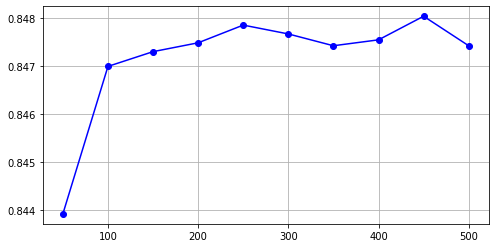

In [144]:
#plotting graph
plt.figure(figsize=(8,4))

pd.Series(accuracy_list_gradient,n_estimator).plot(color='blue',marker='o')
plt.grid()

plt.show()

In [145]:
#With Gradient Boosting, our accuracy seems to increase a lot from 50 to 100.
#After that, there seems to be a relatively steady increase with a few dips 
#occuring. The most optimal number of estimators here are 450 followed by 250

In [146]:
#Lastly, we are going to do the same but for extreme gradient boost. We will 
#install the necessary packages and then continue with the same process

!pip install xgboost
import xgboost as xgb

In [147]:
#setting n_estimator and accuracy list for xgb

n_estimator=list(range(50,550,50))
accuracy_list_xgb=[]

In [148]:
#same for loop but for xgb 

for i in n_estimator:
  #using XGBClassifier on same data

  ensemble_xgb = xgb.XGBClassifier(n_estimators = i, random_state = 101)
  ensemble_xgb.fit(x_train,y_train)

  #y prediction from our xgb ensemble
  y_pred = ensemble_xgb.predict(x_test)

  #xgb accuracy
  accuracy = np.mean(y_test==y_pred)
  accuracy_list_xgb.append(accuracy)



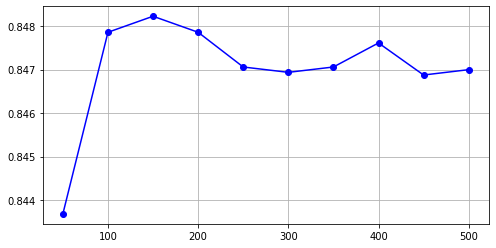

In [149]:
#plotting accuracy compared to estimator for xgb below: 

plt.figure(figsize=(8,4))

pd.Series(accuracy_list_xgb, n_estimator).plot(color='blue',marker='o')
plt.grid()

plt.show()

In [150]:
#Similar to the other two classifiers, XGB has a strong increase from 50 to 100. 
#However, unlike the others, after hitting 150 estimators, there seems to be a 
#decrease in accuracy after that. We see here, three optimal estimator values

#1. 150 - accuracy: 0.8482
#2. 100 - accuracy: 0.8479
#3. 200 - accuracy: 0.8479

#Thus, the optimal appears to be 150 estimators for XGB

5. Compare Performance

In [151]:
#It is time to decide what we want to set as our number of estimators for our 
#graphs. It seems like the best overall will be 400 estimators. It has a 
#consistenly high accuracy across all classifiers so we will set that as a 
#hyper parameter. 

#Setting Hyper-Parameters
est=400
rand=101

In [152]:
#The goal with the following code is to create a dataframe showcasing accuracy 
#and AUC for each classifier. We will start with random forest.

#Random Forest
rf=[]
ensemble_rf = sklearn.ensemble.RandomForestClassifier(n_estimators = est,
                                                      random_state=rand)
ensemble_rf.fit(x_train,y_train)
y_pred = ensemble_rf.predict(x_test)

#generating accuracy for our model
accuracy = np.mean(y_test==y_pred)
rf.append(accuracy)

#generating AUC value for rf
y_pred_auc = ensemble_rf.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_auc)
rfc_auc = metrics.auc(fpr, tpr)
rf.append(rfc_auc)

In [153]:
#AdaBoost
ada=[]
ensemble_ada = AdaBoostClassifier(n_estimators = est,
                                                      random_state=rand)
ensemble_ada.fit(x_train,y_train)
y_pred = ensemble_ada.predict(x_test)

#generating accuracy for our model
accuracy = np.mean(y_test==y_pred)
ada.append(accuracy)

#generating AUC value for ada
y_pred_auc = ensemble_ada.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_auc)
ada_auc = metrics.auc(fpr, tpr)
ada.append(ada_auc)

In [154]:
#GradientBoost
gb=[]
ensemble_gb = GradientBoostingClassifier(n_estimators = est,
                                                      random_state=rand)
ensemble_gb.fit(x_train,y_train)
y_pred = ensemble_gb.predict(x_test)

#generating accuracy for our model
accuracy = np.mean(y_test==y_pred)
gb.append(accuracy)

#generating AUC value for GB
y_pred_auc = ensemble_gb.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_auc)
gb_auc = metrics.auc(fpr, tpr)
gb.append(gb_auc)

In [155]:
#ExtremeGradientBoost
xgbc=[]
ensemble_xgbc = xgb.XGBClassifier(n_estimators = est,
                                                      random_state=rand)
ensemble_xgbc.fit(x_train,y_train)
y_pred = ensemble_xgbc.predict(x_test)

#generating accuracy for our model
accuracy = np.mean(y_test==y_pred)
xgbc.append(accuracy)

#generating AUC value for XGB
y_pred_auc = ensemble_xgbc.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_auc)
xgbc_auc = metrics.auc(fpr, tpr)
xgbc.append(xgbc_auc)

In [159]:
#here we are building the dictionary
classifier_dictionary={'Random Forest':rf,'AdaBoost':ada,
                       'Gradient Boost':gb,'XGB':xgbc}
#creating dataframe with accuracy and auc                       
df=pd.DataFrame(data = classifier_dictionary,index=['Accuracy','AUC'])

In [160]:
#here we are printing our dataframe as well as our comon hyper parameters

print(df)
print('n_estimator: ',est)
print('random_state: ',rand)

          Random Forest  AdaBoost  Gradient Boost       XGB
Accuracy       0.838093  0.845157        0.847552  0.847614
AUC            0.881449  0.897428        0.898988  0.899362
n_estimator:  400
random_state:  101


In [ ]:
#Clearly we see random forest has the worst accuracy and AUC. However, when 
#looking at our classifiers, we see that XGB has the best accuracy as well as 
#AUC (0.847 and 0.899)